In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [8]:
heart = pd.read_csv('../DataSets/heartdataNew.csv')

In [9]:
heart = heart.rename(columns={"cp": "chest_pain", "trestbps": "resting_blood_pressure", "chol": "serum_cholestrol", "fbs": "fasting_blood_sugar", "restecg": "resting_relectro-cardiographic_result", "thalch": "max_heart_rate_achived", "exang": "exercise_induced_angina"})

In [10]:
heart.head(10)

,chest_pain,resting_blood_pressure,serum_cholestrol,fasting_blood_sugar,resting_relectro-cardiographic_result,thalach,exercise_induced_angina,target
0,3,145,233,1,0,150,0,1
1,2,130,250,0,1,187,0,1
2,1,130,204,0,0,172,0,1
3,1,120,236,0,1,178,0,1
4,0,120,354,0,1,163,1,1
5,0,140,192,0,1,148,0,1
6,1,140,294,0,0,153,0,1
7,1,120,263,0,1,173,0,1
8,2,172,199,1,1,162,0,1
9,2,150,168,0,1,174,0,1


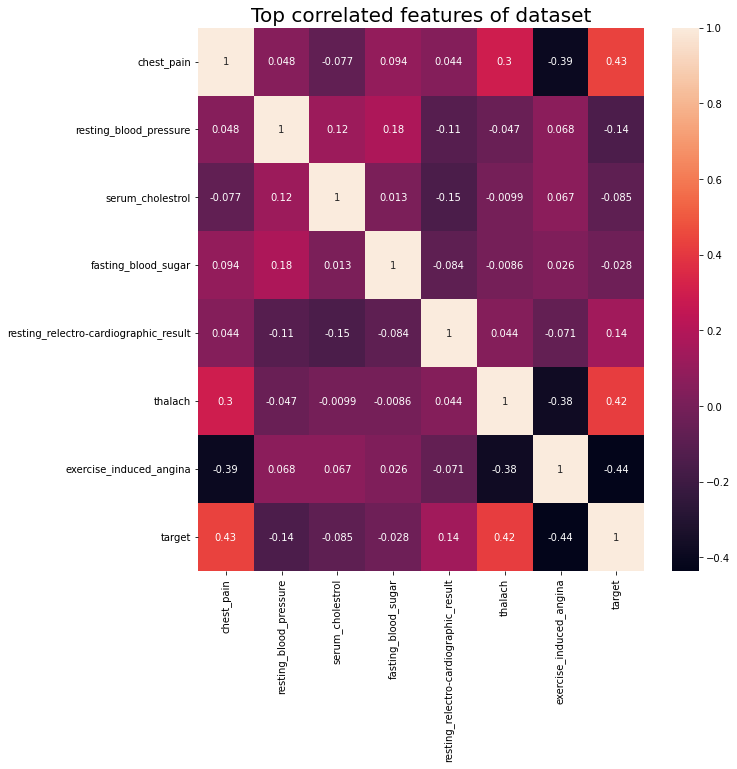

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(heart.corr(), annot = True)
plt.title('Top correlated features of dataset', size=20)
plt.show()

In [12]:
labels = heart['target']
features = heart.drop(['target'], axis = 1)

In [39]:
features_train , features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.3, random_state=2)

In [40]:
logisticRegression = LogisticRegression( solver='lbfgs')
logisticRegression.fit(features_train,labels_train)
logisticRegression.score(features_test,labels_test)
score = round(logisticRegression.score(features_test,labels_test), 3) *100
print(f"Logistic Regression accuracy is {score}%")

y_pred=logisticRegression.predict(features_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(labels_test,y_pred))
arr = confusion_matrix(labels_test,y_pred)
TP = arr[1][1]
TN = arr[0][0]
FP = arr[0][1]
FN = arr[1][0]
print("Confusion Matrix:\n",confusion_matrix(labels_test,y_pred))
print("Training Score:\n",logisticRegression.score(features_train,labels_train)*100)
print("Mean Squared Error:\n",mean_squared_error(labels_test,y_pred))
print("R2 score is:\n",r2_score(labels_test,y_pred))

Logistic Regression accuracy is 84.6%
Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91

Confusion Matrix:
 [[32  9]
 [ 5 45]]
Training Score:
 76.41509433962264
Mean Squared Error:
 0.15384615384615385
R2 score is:
 0.37853658536585366


In [16]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
confaccuracy = (float (TP+TN) / float(TP + TN + FP + FN))
confmisclassification = 1- confaccuracy
confsensitivity = (TP / float(TP + FN))
confprecision = (TN / float(TN + FP))
conff1 = 2 * ((confprecision * confsensitivity) / (confprecision + confsensitivity))
print('-'*50)
print(f'Accuracy: {round(confaccuracy,2)}') 
print(f'Mis-Classification: {round(confmisclassification,2)}') 
print(f'Sensitivity: {round(confsensitivity,2)}') 
print(f'Precision: {round(confprecision,2)}')
print(f'f_1 Score: {round(conff1,2)}')

True Positives: 45
True Negatives: 32
False Positives: 9
False Negatives: 5
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.9
Precision: 0.78
f_1 Score: 0.84


Text(0.5, 1.0, 'Logistic Regression: Confusion Matrix')

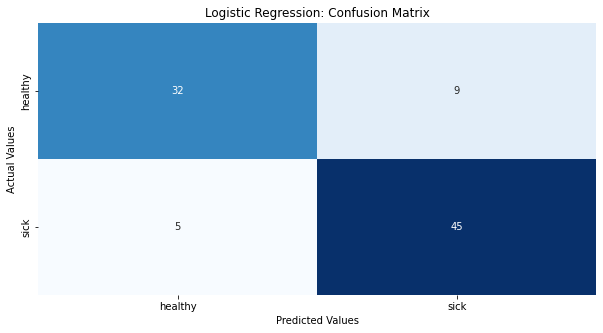

In [17]:
labels_predicted = logisticRegression.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression: Confusion Matrix')